In [1]:
%%javascript
IPython.notebook.clear_all_output();

<IPython.core.display.Javascript object>

# Truss Decomposition
* Not implemented by networkx
* Paper: http://vldb.org/pvldb/vol5/p812_jiawang_vldb2012.pdf
* Code: https://github.com/cntswj/truss-decomposition
* We are wrapping it into a Python API

## Truss Program Preparation

In [2]:
!wget https://github.com/cntswj/truss-decomposition/archive/master.zip

--2020-03-19 11:48:27--  https://github.com/cntswj/truss-decomposition/archive/master.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/cntswj/truss-decomposition/zip/master [following]
--2020-03-19 11:48:27--  https://codeload.github.com/cntswj/truss-decomposition/zip/master
Resolving codeload.github.com (codeload.github.com)... 192.30.255.121
Connecting to codeload.github.com (codeload.github.com)|192.30.255.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [ <=>                ]   2.38K  --.-KB/s    in 0s      

2020-03-19 11:48:27 (5.97 MB/s) - ‘master.zip’ saved [2442]



In [3]:
!unzip master.zip

Archive:  master.zip
da501664bf767659c0780344d7f3eb03fdd3195b
   creating: truss-decomposition-master/
  inflating: truss-decomposition-master/README.md  
  inflating: truss-decomposition-master/imtd.cpp  


In [0]:
!rm master.zip

In [0]:
truss_code = 'truss-decomposition-master/imtd.cpp'
!g++ -O2 $truss_code -o truss

In [0]:
!rm -r truss-decomposition-master

## Truss Program Wrapper

In [7]:
!wget https://github.com/yanlab19870714/bionet/archive/master.zip
!unzip master.zip
!rm master.zip
!mv bionet-master/Dynamic_coexp_Networks .
!mv bionet-master/Dynamic_PPI_Networks .
!rm -r bionet-master/

--2020-03-19 11:48:38--  https://github.com/yanlab19870714/bionet/archive/master.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/yanlab19870714/bionet/zip/master [following]
--2020-03-19 11:48:38--  https://codeload.github.com/yanlab19870714/bionet/zip/master
Resolving codeload.github.com (codeload.github.com)... 140.82.112.10
Connecting to codeload.github.com (codeload.github.com)|140.82.112.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [            <=>     ]  31.70M  3.35MB/s    in 9.5s    

2020-03-19 11:48:48 (3.35 MB/s) - ‘master.zip’ saved [33241003]

Archive:  master.zip
f8865050f7a633def4d1daa3d610ee6947d323f0
   creating: bionet-master/
  inflating: bionet-master/.DS_Store  
   creating: bionet-master/.ipynb

In [8]:
!ls -l Dynamic_PPI_Networks

total 776
-rwxr-xr-x 1 root root  10164 Mar 19 01:36 10D_sen_ppi_edges.csv
-rwxr-xr-x 1 root root  20034 Mar 19 01:36 12D_sen_ppi_edges.csv
-rwxr-xr-x 1 root root  37758 Mar 19 01:36 14D_sen_ppi_edges.csv
-rwxr-xr-x 1 root root  38010 Mar 19 01:36 16D_sen_ppi_edges.csv
-rwxr-xr-x 1 root root  49644 Mar 19 01:36 18D_sen_ppi_edges.csv
-rwxr-xr-x 1 root root  68376 Mar 19 01:36 20D_sen_ppi_edges.csv
-rwxr-xr-x 1 root root  79548 Mar 19 01:36 22D_sen_ppi_edges.csv
-rwxr-xr-x 1 root root  94017 Mar 19 01:36 24D_sen_ppi_edges.csv
-rwxr-xr-x 1 root root 101871 Mar 19 01:36 26D_sen_ppi_edges.csv
-rwxr-xr-x 1 root root 116046 Mar 19 01:36 28D_sen_ppi_edges.csv
-rwxr-xr-x 1 root root 150024 Mar 19 01:36 30D_sen_ppi_edges.csv
-rwxr-xr-x 1 root root    294 Mar 19 01:36 6D_sen_ppi_edges.csv
-rwxr-xr-x 1 root root   3486 Mar 19 01:36 8D_sen_ppi_edges.csv


In [0]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import os

def load(filepath, name = None):
    line_counter = 0
    if name == None: name = os.path.basename(filepath)
    G = nx.Graph(name = name)
    with open(filepath, 'r') as file:
        for line in file:
            v = line.split(',')
            if v[0] != v[1][:-1]:
              G.add_edge(v[0], v[1][:-1])
            line_counter += 1
            if line_counter % 100000 == 0: print(line_counter, 'lines processed')
    print('====== SUMMARY ======')
    print(nx.info(G))
    return G

In [10]:
G = load('Dynamic_coexp_Networks/6D_sen_net.csv')

====== SUMMARY ======
Name: 6D_sen_net.csv
Type: Graph
Number of nodes: 333
Number of edges: 1356
Average degree:   8.1441


In [0]:
def get_node_labels_mapping(G, first_label=0, ordering="default", label_attribute=None):
    N = G.number_of_nodes()+first_label
    if ordering == "default":
        mapping = dict(zip(G.nodes(), range(first_label, N)))
    elif ordering == "sorted":
        nlist = G.nodes()
        nlist.sort()
        mapping = dict(zip(nlist, range(first_label, N)))
    elif ordering == "increasing degree":
        dv_pairs = [(d,n) for (n,d) in G.degree_iter()]
        dv_pairs.sort() # in-place sort from lowest to highest degree
        mapping = dict(zip([n for d,n in dv_pairs], range(first_label, N)))
    elif ordering == "decreasing degree":
        dv_pairs = [(d,n) for (n,d) in G.degree_iter()]
        dv_pairs.sort() # in-place sort from lowest to highest degree
        dv_pairs.reverse()
        mapping = dict(zip([n for d,n in dv_pairs], range(first_label, N)))
    else:
        raise nx.NetworkXError('Unknown node ordering: %s'%ordering)
    return mapping

In [0]:
def convert_to_file(G):
  G_recode = nx.convert_node_labels_to_integers(G)
  with open(G.name + '.txt', 'w') as file:
    file.write(str(G_recode.number_of_nodes()) + ' ' + str(G_recode.number_of_edges()) + '\n')
    for u,v in G_recode.edges():
      file.write(str(u) + ' ' + str(v) +'\n')
  cmd = './truss ' + G.name
  print(cmd)
  os.system(cmd)
  cmd = 'rm ' + G.name + '.txt'
  print(cmd)
  os.system(cmd)
  # ------ reverse mapping
  mapping = get_node_labels_mapping(G)
  reverse_map = dict()
  for k,v in mapping.items():
    reverse_map[v] = k
  return reverse_map

In [100]:
rmap = convert_to_file(G)

./truss 6D_sen_net.csv
rm 6D_sen_net.csv.txt


In [0]:
class edge_c:
  # u, v, c
  def __lt__(self, other): # sort by length, large goes first
        return self.c < other.c

def parse_edges(G): #!!!!!!!! g-name
  edges = list()
  with open(G.name + '-out.txt', 'r') as file:
    for line in file:
      if len(line) == 0 or line[0] != '(': continue
      if line[-1] == '\n': line = line[:-1]
      splits = line[1:].split(',')
      edge = edge_c()
      edge.u = int(splits[0])
      splits = splits[1].split(')')
      edge.v = int(splits[0])
      edge.c = int(splits[1][1:])
      edges.append(edge)
  return edges

In [0]:
edges = parse_edges(G)

In [0]:
def get_edges_of_truss(k, edges):
  result = list()
  for edge in edges:
    if edge.c >= k:
      result.append((edge.u, edge.v))
  return result

In [63]:
print('max-k:', edges[-1].c)

max-k: 13


In [0]:
ktruss_edges = get_edges_of_truss(12, edges)

In [0]:
def get_ktruss_graph(k, edges):
  ktruss_edges = get_edges_of_truss(k, edges)
  g = nx.Graph()
  g.add_edges_from(ktruss_edges)
  return g

In [0]:
def plot(G):
  plt.rcParams["figure.figsize"] = (18,9)
  nx.draw_circular(G, with_labels = True, font_color = 'r', font_size = 20, node_color = 'y')
  plt.draw()
  plt.show()

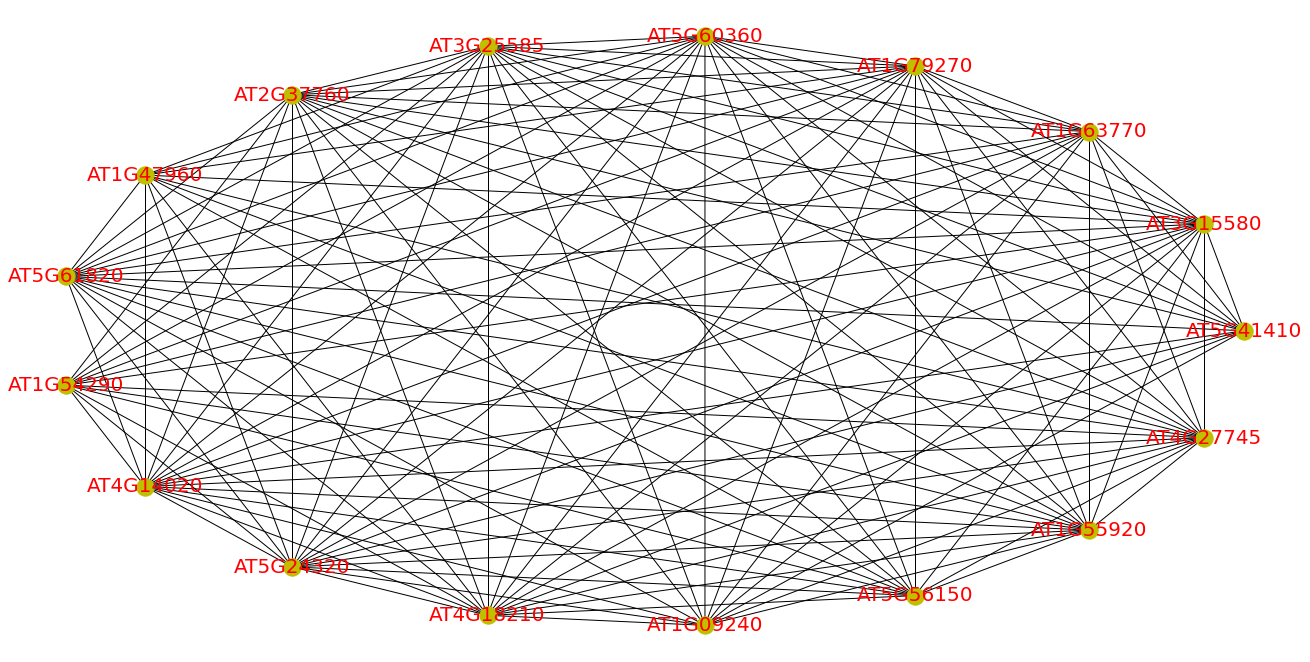

In [112]:
g = get_ktruss_graph(12, edges)
plot(nx.relabel_nodes(g, rmap))

## Extract Itemsets

In [0]:
import time

def truss_components(G, k):
    start_time = time.time()
    rmap = convert_to_file(G)
    edges = parse_edges(G)
    g = get_ktruss_graph(k, edges)
    g = nx.relabel_nodes(g, rmap)
    print('====== SUMMARY ======')
    print(nx.info(g))
    graphs = nx.connected_component_subgraphs(g)
    elapsed_time = time.time() - start_time
    print('Time Elapsed:', elapsed_time, 'seconds')
    return list(graphs)

def truss_components_maxTruss(G):
    start_time = time.time()
    rmap = convert_to_file(G)
    edges = parse_edges(G)
    k = edges[-1].c
    g = get_ktruss_graph(k, edges)
    g.name = G.name
    g = nx.relabel_nodes(g, rmap)
    print('====== SUMMARY ======')
    print(nx.info(g))
    graphs = [g.subgraph(c) for c in nx.connected_components(g)]
    elapsed_time = time.time() - start_time
    print('Time Elapsed:', elapsed_time, 'seconds')
    return list(graphs), k

def report(components):
    start_time = time.time()
    for g in components:
        print(nx.info(g))
    elapsed_time = time.time() - start_time
    print('Time Elapsed:', elapsed_time, 'seconds')

In [129]:
graphs, max_truss = truss_components_maxTruss(G)
print('max_truss:', max_truss)

./truss 6D_sen_net.csv
rm 6D_sen_net.csv.txt
====== SUMMARY ======
Name: 6D_sen_net.csv
Type: Graph
Number of nodes: 13
Number of edges: 78
Average degree:  12.0000
Time Elapsed: 0.0484011173248291 seconds
max_truss: 13


In [130]:
report(graphs)

Name: 6D_sen_net.csv
Type: Graph
Number of nodes: 13
Number of edges: 78
Average degree:  12.0000
Time Elapsed: 0.0006706714630126953 seconds


In [236]:
db = list() # split subgraphs
times = list() # record time step #

for day in range(6,19,2):
    fname = 'Dynamic_coexp_Networks/' + str(day) + 'D_sen_net.csv'
    print('######################## day =', day)
    G = load(fname)
    # ------------
    graphs, max_truss = truss_components_maxTruss(G)
    print('max_truss:', max_truss)
    # ------------
    print('#{components}:', len(graphs))
    for graph in graphs:
        itemset = list(graph.nodes)
        db.append(itemset)
        times.append(day)
    print()

######################## day = 6
====== SUMMARY ======
Name: 6D_sen_net.csv
Type: Graph
Number of nodes: 333
Number of edges: 1356
Average degree:   8.1441
./truss 6D_sen_net.csv
rm 6D_sen_net.csv.txt
====== SUMMARY ======
Name: 6D_sen_net.csv
Type: Graph
Number of nodes: 13
Number of edges: 78
Average degree:  12.0000
Time Elapsed: 0.11472415924072266 seconds
max_truss: 13
#{components}: 1

######################## day = 8
====== SUMMARY ======
Name: 8D_sen_net.csv
Type: Graph
Number of nodes: 837
Number of edges: 9119
Average degree:  21.7897
./truss 8D_sen_net.csv
rm 8D_sen_net.csv.txt
====== SUMMARY ======
Name: 8D_sen_net.csv
Type: Graph
Number of nodes: 41
Number of edges: 780
Average degree:  38.0488
Time Elapsed: 0.23899126052856445 seconds
max_truss: 31
#{components}: 1

######################## day = 10
====== SUMMARY ======
Name: 10D_sen_net.csv
Type: Graph
Number of nodes: 1578
Number of edges: 43556
Average degree:  55.2041
./truss 10D_sen_net.csv
rm 10D_sen_net.csv.txt
==

In [237]:
n = len(range(6,19,2))
print(n)

7


In [136]:
!pip install prefixspan

  Created wheel for prefixspan: filename=prefixspan-0.5.2-cp36-none-any.whl size=11219 sha256=82d4c867eb76c81902ca8104dc46f907b20e057c7f9486b185f72153952d7aa3
  Stored in directory: /root/.cache/pip/wheels/31/73/e2/681c2d81b43389e5c8532de53dffc444304367c903026d4ba0
  Created wheel for extratools: filename=extratools-0.8.2.1-cp36-none-any.whl size=28870 sha256=ad817b2a99b24118ecdd4acd28836c8f0886e6cb9bb1d1e4776fd58d18358bc2
  Stored in directory: /root/.cache/pip/wheels/54/b8/e5/6ae8626c4b1543fecdcf15ead7e78bdf7ab7d42ee2076cb56b
Successfully built prefixspan extratools


In [0]:
from prefixspan import PrefixSpan

ps = PrefixSpan(db)

In [0]:
def get_itemsets(ps, tau_freq):
    start_time = time.time()
    result = ps.frequent(tau_freq, closed = True) # !!! consider closed patterns
    elapsed_time = time.time() - start_time
    print('Time Elapsed:', elapsed_time, 'seconds')
    return result

def prune(itemsets, tau_size):
    result = []
    for itemset in itemsets:
        if len(itemset[1]) >= tau_size:
            result.append(itemset)
    return result

In [243]:
tau_freq = 4 # tune !!! cannot be too small

itemsets = get_itemsets(ps, tau_freq)
print('#{patterns}:', len(itemsets))

Time Elapsed: 5.4420881271362305 seconds
#{patterns}: 7847


In [249]:
tau_size = 8 # tune !!! this is a cheap pruning, do not rerun get_itemsets !!!

pruned = prune(itemsets, tau_size)
print('#{patterns}:', len(pruned))

#{patterns}: 217


In [250]:
display(pruned)

[(4,
  ['AT1G10140',
   'AT4G26270',
   'AT1G12810',
   'AT1G76920',
   'AT1G53580',
   'AT2G01650',
   'AT1G18470',
   'AT2G41220',
   'AT5G05110']),
 (4,
  ['AT1G10140',
   'AT4G26270',
   'AT1G12810',
   'AT1G76920',
   'AT1G53580',
   'AT2G01650',
   'AT1G18470',
   'AT2G41220',
   'AT1G21400']),
 (4,
  ['AT1G10140',
   'AT4G26270',
   'AT1G12810',
   'AT1G76920',
   'AT1G53580',
   'AT2G01650',
   'AT1G18470',
   'AT1G01650',
   'AT1G21400']),
 (4,
  ['AT1G10140',
   'AT4G26270',
   'AT1G12810',
   'AT1G76920',
   'AT1G53580',
   'AT2G01650',
   'AT1G18470',
   'AT1G58030',
   'AT1G21400']),
 (4,
  ['AT1G10140',
   'AT4G26270',
   'AT1G12810',
   'AT1G76920',
   'AT1G53580',
   'AT2G01650',
   'AT1G18470',
   'AT1G23780',
   'AT1G21400']),
 (4,
  ['AT1G10140',
   'AT4G26270',
   'AT1G12810',
   'AT1G76920',
   'AT1G53580',
   'AT2G01650',
   'AT1G18470',
   'AT4G37520']),
 (4,
  ['AT1G10140',
   'AT4G26270',
   'AT1G12810',
   'AT1G76920',
   'AT1G53580',
   'AT2G01650',
   'AT1G1

# Attaching Time Labels

In [0]:
# Attaching Time Labels
db_sets = []
for row in db:
    db_sets.append(set(row))

In [0]:
def get_time(itemlist):
    result = list()
    for i in range(len(db_sets)):
        time_step = times[i]
        superset = db_sets[i]
        if superset.issuperset(itemlist):
            result.append(time_step)
    return result

In [0]:
patt_file = 'output.txt'

In [0]:
fout = open(patt_file, 'w')
patt_counter = 0
n_patt = len(pruned)

for freq, pattern in pruned:
    time_snapshots = get_time(pattern)
    assert len(time_snapshots) == freq, '[ERROR] pattern frequency mismatch'
    patt_counter += 1
    if patt_counter % 10000 == 0: print(patt_counter, 'patterns processed among', n_patt)
    # ------
    fout.write('#\n')
    for item in time_snapshots:
        fout.write(str(item) + ' ')
    fout.write('\n')
    for item in pattern:
        fout.write(str(item) + ' ')
    fout.write('\n')
fout.close()

In [0]:
class temp_patt:
    # time_seq
    # node_set
    
    def __lt__(self, other): # sort by length, large goes first
        return len(self.node_set) > len(other.node_set)
    
    def plot(self, G):
        plt.rcParams["figure.figsize"] = (20,10)
        subG = G.subgraph(self.node_set)
        nx.draw_circular(subG, with_labels = True, font_color = 'r', font_size = 20, node_color = 'y')
        plt.draw()
        plt.show()

patts = list()

fin = open(patt_file, 'r')
temp = None
state = 0
for line in fin:
    if line[0] == '#':
        temp = temp_patt()
        state = 1
    elif state == 1:
        items = line[:-2].split(' ') # remove space + \n
        temp.time_seq = [int(x) for x in items]
        state = 2
    else:
        temp.node_set = line[:-2].split(' ') # remove space + \n
        patts.append(temp)
fin.close()

# Printing Patterns Ordered by Pattern Length

In [256]:
for patt in patts:
    print(patt.time_seq)
    print(patt.node_set)
    print()

[12, 14, 16, 18]
['AT1G10140', 'AT4G26270', 'AT1G12810', 'AT1G76920', 'AT1G53580', 'AT2G01650', 'AT1G18470', 'AT2G41220', 'AT5G05110']

[12, 14, 16, 18]
['AT1G10140', 'AT4G26270', 'AT1G12810', 'AT1G76920', 'AT1G53580', 'AT2G01650', 'AT1G18470', 'AT2G41220', 'AT1G21400']

[12, 14, 16, 18]
['AT1G10140', 'AT4G26270', 'AT1G12810', 'AT1G76920', 'AT1G53580', 'AT2G01650', 'AT1G18470', 'AT1G01650', 'AT1G21400']

[12, 14, 16, 18]
['AT1G10140', 'AT4G26270', 'AT1G12810', 'AT1G76920', 'AT1G53580', 'AT2G01650', 'AT1G18470', 'AT1G58030', 'AT1G21400']

[12, 14, 16, 18]
['AT1G10140', 'AT4G26270', 'AT1G12810', 'AT1G76920', 'AT1G53580', 'AT2G01650', 'AT1G18470', 'AT1G23780', 'AT1G21400']

[12, 14, 16, 18]
['AT1G10140', 'AT4G26270', 'AT1G12810', 'AT1G76920', 'AT1G53580', 'AT2G01650', 'AT1G18470', 'AT4G37520']

[12, 14, 16, 18]
['AT1G10140', 'AT4G26270', 'AT1G12810', 'AT1G76920', 'AT1G53580', 'AT2G01650', 'AT1G18470', 'AT2G42790', 'AT1G21400']

[12, 14, 16, 18]
['AT1G10140', 'AT4G26270', 'AT1G12810', 'AT1

In [0]:
patts = sorted(patts)

In [258]:
for patt in patts:
    print(patt.time_seq)
    print(patt.node_set)
    print()

[12, 14, 16, 18]
['AT1G10140', 'AT4G26270', 'AT1G12810', 'AT1G76920', 'AT1G53580', 'AT2G01650', 'AT1G18470', 'AT2G41220', 'AT5G05110']

[12, 14, 16, 18]
['AT1G10140', 'AT4G26270', 'AT1G12810', 'AT1G76920', 'AT1G53580', 'AT2G01650', 'AT1G18470', 'AT2G41220', 'AT1G21400']

[12, 14, 16, 18]
['AT1G10140', 'AT4G26270', 'AT1G12810', 'AT1G76920', 'AT1G53580', 'AT2G01650', 'AT1G18470', 'AT1G01650', 'AT1G21400']

[12, 14, 16, 18]
['AT1G10140', 'AT4G26270', 'AT1G12810', 'AT1G76920', 'AT1G53580', 'AT2G01650', 'AT1G18470', 'AT1G58030', 'AT1G21400']

[12, 14, 16, 18]
['AT1G10140', 'AT4G26270', 'AT1G12810', 'AT1G76920', 'AT1G53580', 'AT2G01650', 'AT1G18470', 'AT1G23780', 'AT1G21400']

[12, 14, 16, 18]
['AT1G10140', 'AT4G26270', 'AT1G12810', 'AT1G76920', 'AT1G53580', 'AT2G01650', 'AT1G18470', 'AT2G42790', 'AT1G21400']

[12, 14, 16, 18]
['AT1G10140', 'AT4G26270', 'AT1G12810', 'AT1G76920', 'AT1G53580', 'AT2G01650', 'AT1G18470', 'AT3G04350', 'AT1G21400']

[12, 14, 16, 18]
['AT1G10140', 'AT4G26270', 'AT1

# Plot Patterns


[12, 14, 16, 18]
100000 lines processed
200000 lines processed
====== SUMMARY ======
Name: 16D_sen_net.csv
Type: Graph
Number of nodes: 3326
Number of edges: 290400
Average degree: 174.6242


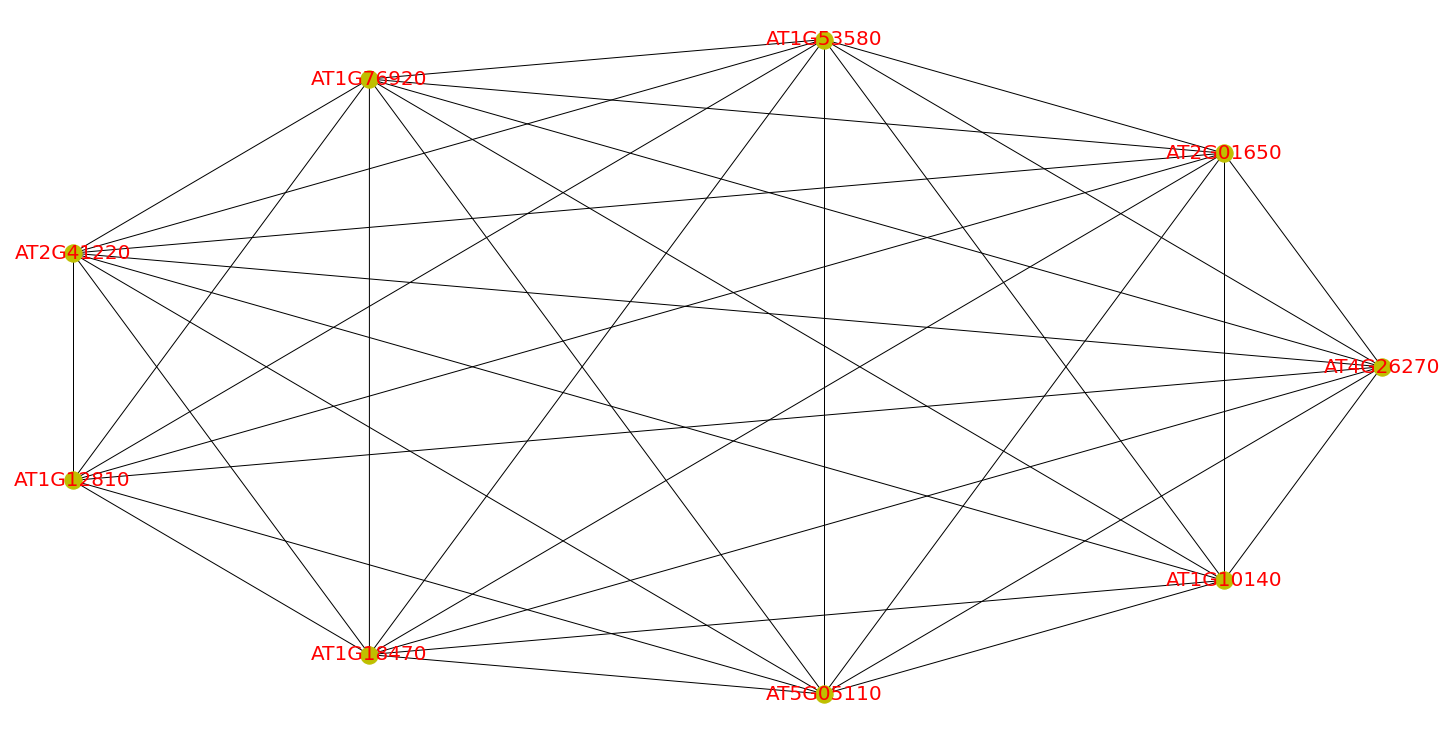

In [259]:
i = 0

print(patts[i].time_seq)
G_cur = load('Dynamic_coexp_Networks/16D_sen_net.csv') # time = 16
patts[i].plot(G_cur)

[12, 14, 16, 18]
100000 lines processed
200000 lines processed
====== SUMMARY ======
Name: 16D_sen_net.csv
Type: Graph
Number of nodes: 3326
Number of edges: 290400
Average degree: 174.6242


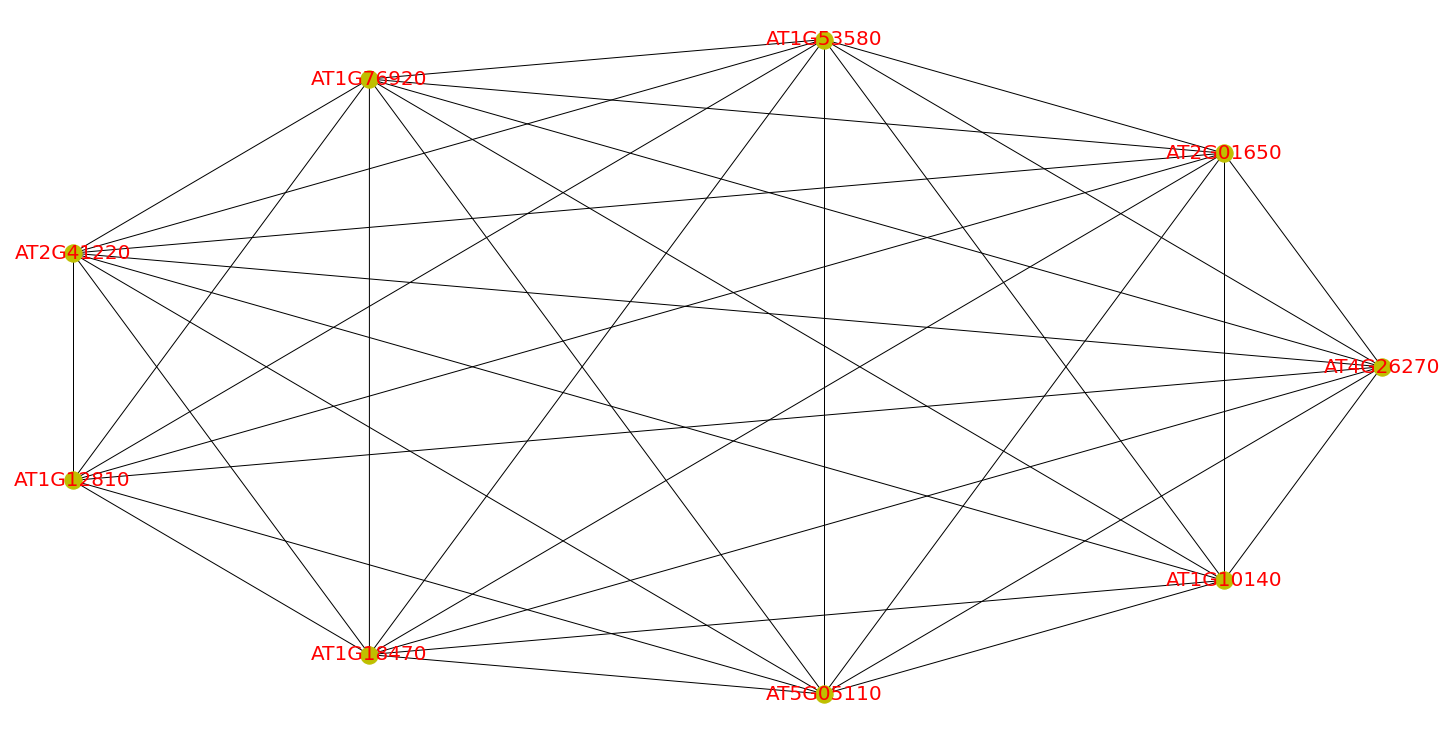

In [260]:
i = 0

print(patts[i].time_seq)
G_cur = load('Dynamic_coexp_Networks/16D_sen_net.csv') # time = 16
patts[i].plot(G_cur)

# PrefixSpan over the Result Patterns Again

In [0]:
patt_db = list()

for patt in patts:
    patt_db.append(patt.node_set)

In [0]:
from prefixspan import PrefixSpan

ps = PrefixSpan(patt_db)

In [277]:
tau_freq = 5 # tune !!! cannot be too small

itemsets = get_itemsets(ps, tau_freq)
print('#{patterns}:', len(itemsets))

Time Elapsed: 0.07779264450073242 seconds
#{patterns}: 339


In [281]:
tau_size = 6 # tune !!! this is a cheap pruning, do not rerun get_itemsets !!!

pruned = prune(itemsets, tau_size)
print('#{patterns}:', len(pruned))

#{patterns}: 99


# Plot All Patterns, time = Day 12 to Day 18

In [0]:
def plot(G):
  plt.rcParams["figure.figsize"] = (20,10)
  nx.draw_circular(G, with_labels = True, font_color = 'r', font_size = 20, node_color = 'y')
  plt.draw()
  plt.show()

In [0]:
def plot_subg(G, node_set):
  subG = G.subgraph(node_set)
  plot(subG)

100000 lines processed
200000 lines processed
300000 lines processed
400000 lines processed
500000 lines processed
600000 lines processed
700000 lines processed
800000 lines processed
900000 lines processed
====== SUMMARY ======
Name: 30D_sen_net.csv
Type: Graph
Number of nodes: 7381
Number of edges: 943161
Average degree: 255.5646


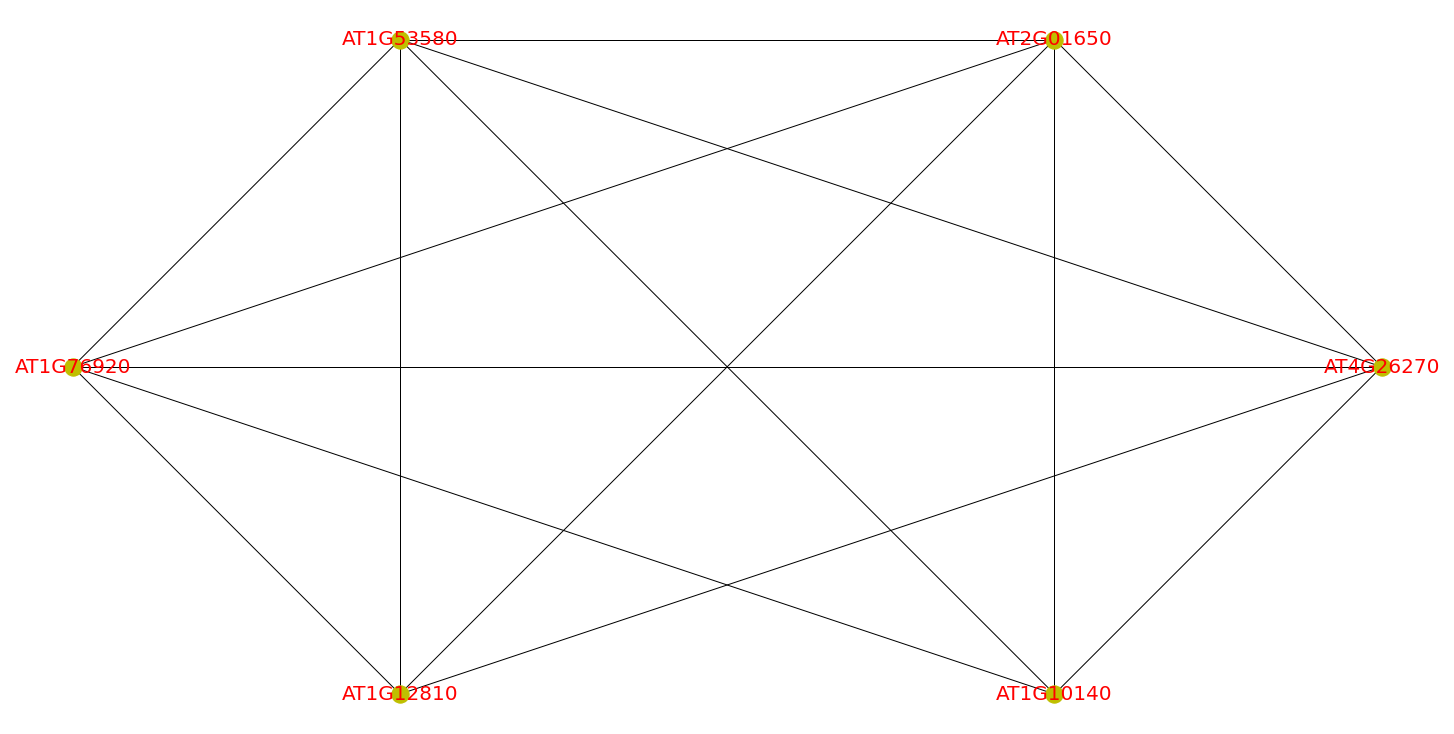

In [284]:
G_cur = load('Dynamic_coexp_Networks/30D_sen_net.csv') # time = 30
plot_subg(G_cur, pruned[0][1])

100000 lines processed
200000 lines processed
====== SUMMARY ======
Name: 14D_sen_net.csv
Type: Graph
Number of nodes: 3385
Number of edges: 289706
Average degree: 171.1705


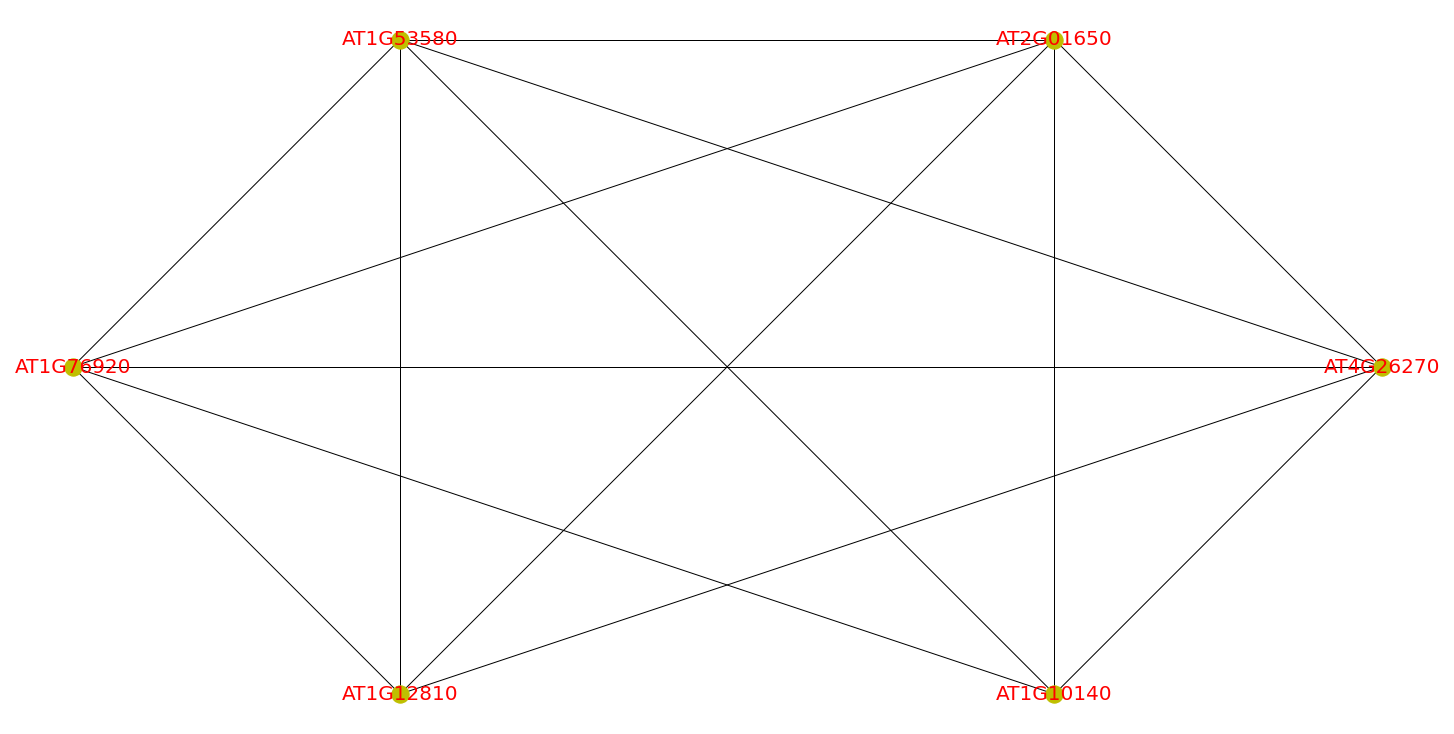

In [286]:
G_cur = load('Dynamic_coexp_Networks/14D_sen_net.csv') # time = 14
plot_subg(G_cur, pruned[0][1])

# Merge Result Graphs

In [287]:
G_cur = load('Dynamic_coexp_Networks/14D_sen_net.csv') # time = 14

100000 lines processed
200000 lines processed
====== SUMMARY ======
Name: 14D_sen_net.csv
Type: Graph
Number of nodes: 3385
Number of edges: 289706
Average degree: 171.1705


In [0]:
G_merge = nx.Graph(name = 'MERGE')

for patt in pruned:
  node_set = patt[1]
  G_sub = G_cur.subgraph(node_set)
  G_merge = nx.compose(G_merge, G_sub)

In [289]:
print(nx.info(G_merge))

Name: 14D_sen_net.csv
Type: Graph
Number of nodes: 44
Number of edges: 288
Average degree:  13.0909


In [0]:
def plot(G):
  plt.rcParams["figure.figsize"] = (20,20)
  nx.draw_spring(G, with_labels = True, font_color = 'r', font_size = 20, node_color = 'y')
  plt.draw()
  plt.show()

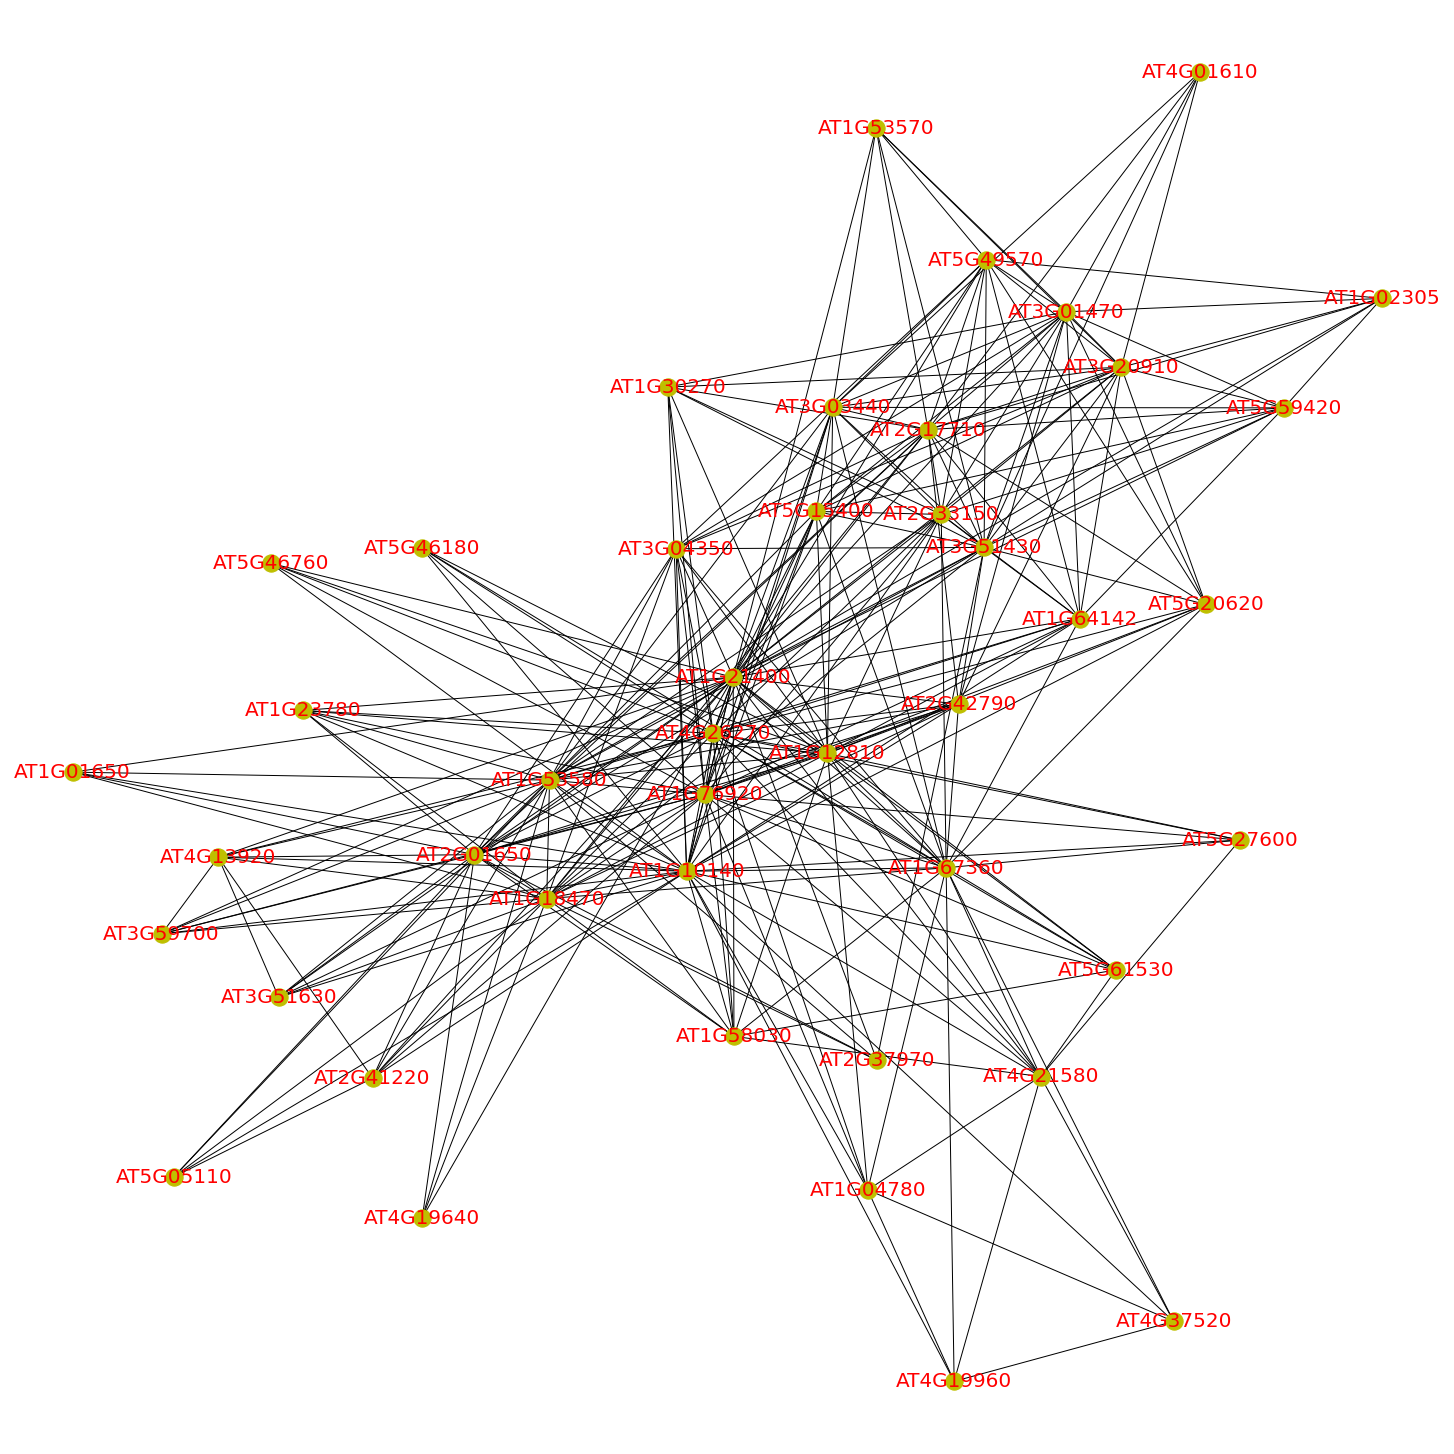

In [293]:
plot(G_merge)